In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
 #%%

# google colab configurations 
# these might change

# torch imports
import torch

# import utils
import json
from datetime import date
import os

google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 

    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)


    COLAB_CONFIG = '1o5nZNVmNBq3UQRxwYIwOATX0c0GyHPRN'
    COLAB_CONFIG_FILE ='colab_config.json'

    colab_json = drive.CreateFile({'id': COLAB_CONFIG})
    colab_json.GetContentFile(COLAB_CONFIG_FILE)

    with open(COLAB_CONFIG_FILE) as f:
        temp = f.read()
    colab_config = json.loads(temp)

    for key in colab_config:
        globals()[key] = drive.CreateFile({"id":colab_config[key]['id']})
        globals()[key].GetContentFile(colab_config[key]['file'])

    from trainer import RegressionTrainer
    from datageneration import DataGenerator
    from helpers import Helper, Plotter
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')

    # custom imports
    from cnp.trainer import RegressionTrainer
    from cnp.datageneration import DataGenerator
    from cnp.helpers import Helper

Running on Colab?
no
Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [3]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = ''
else:
    config_dir = os.path.join(BASE_DIR,'configs')

with open(os.path.join(config_dir,'1d_singlefunc_config.json')) as f:
    file = f.read()
    default_conf = json.loads(file)



In [4]:

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['single_function']['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['single_function']['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


In [5]:
default_conf['single_function']['training_params']['kwargs']['data_path'] = os.path.join(
    BASE_DIR,
    default_conf['single_function']['training_params']['kwargs']['data_dir'],
     default_conf['single_function']['training_params']['kwargs']['extension'],
    default_conf['single_function']['training_params']['kwargs']['data_file'])

## Generating data on the fly from a simple function.

In [16]:
# creating an instance of to orchestrate the training
trainer = RegressionTrainer(**default_conf['multiple_functions']['experiment_params'])

  0%|          | 0/10000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 3.7097506523132324
 Validation loss after 0 equals                     2.932751178741455


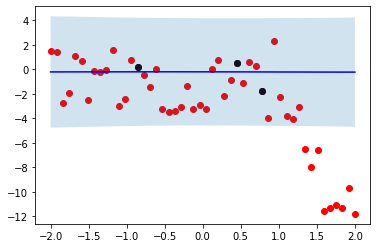

  1%|          | 96/10000 [00:01<04:35, 36.00it/s]

Mean loss at epoch 100 : 2.756713628768921
 Validation loss after 100 equals                     3.294827938079834


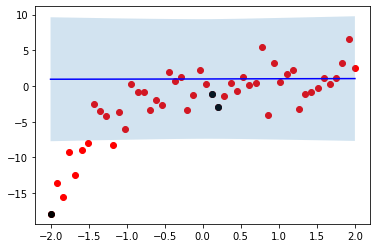

  2%|▏         | 195/10000 [00:02<01:50, 88.39it/s]

Mean loss at epoch 200 : 3.359858989715576
 Validation loss after 200 equals                     2.5981264114379883


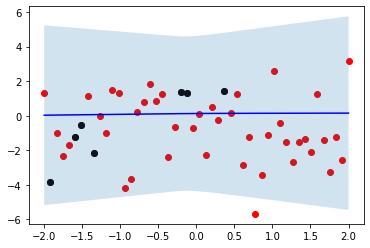

  3%|▎         | 294/10000 [00:03<01:28, 109.54it/s]

Mean loss at epoch 300 : 2.7513198852539062
 Validation loss after 300 equals                     3.0344455242156982


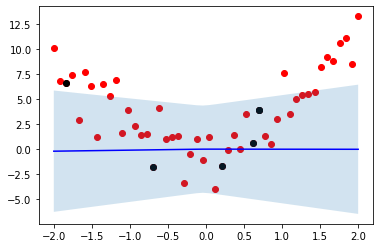

  4%|▍         | 394/10000 [00:05<02:38, 60.58it/s] 

Mean loss at epoch 400 : 2.7318899631500244
 Validation loss after 400 equals                     2.7855162620544434


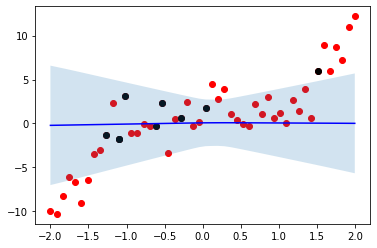

  5%|▍         | 486/10000 [00:06<01:32, 103.15it/s]

Mean loss at epoch 500 : 2.845566511154175
 Validation loss after 500 equals                     2.9382660388946533


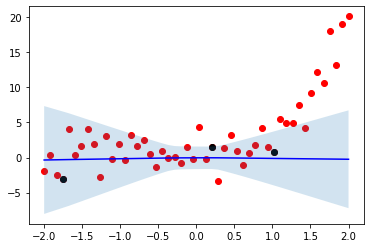

  6%|▌         | 600/10000 [00:08<01:54, 82.33it/s] 

Mean loss at epoch 600 : 2.6042113304138184
 Validation loss after 600 equals                     2.74246883392334


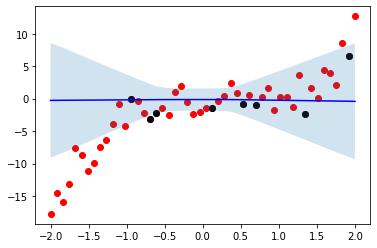

  7%|▋         | 699/10000 [00:09<02:19, 66.63it/s]

Mean loss at epoch 700 : 2.7678208351135254
 Validation loss after 700 equals                     2.5077223777770996


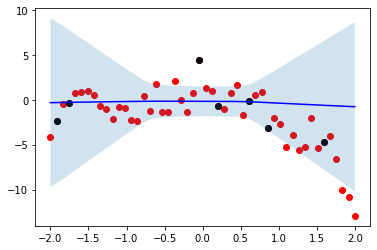

  8%|▊         | 789/10000 [00:12<02:55, 52.41it/s]

Mean loss at epoch 800 : 2.5617477893829346
 Validation loss after 800 equals                     3.1416354179382324


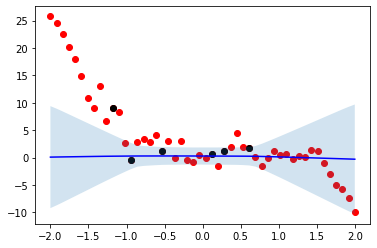

  9%|▉         | 894/10000 [00:13<01:19, 113.91it/s]

Mean loss at epoch 900 : 3.330873966217041
 Validation loss after 900 equals                     2.430476188659668


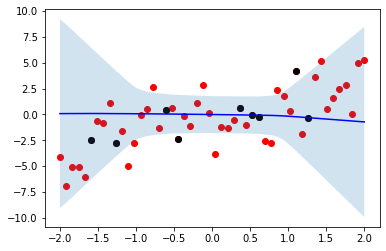

 10%|▉         | 995/10000 [00:14<01:18, 114.62it/s]

Mean loss at epoch 1000 : 3.022759437561035
 Validation loss after 1000 equals                     2.9836184978485107


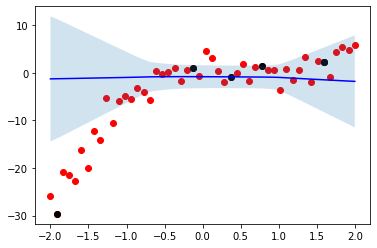

 11%|█         | 1089/10000 [00:15<01:01, 145.01it/s]

Mean loss at epoch 1100 : 2.5925769805908203
 Validation loss after 1100 equals                     2.851557731628418


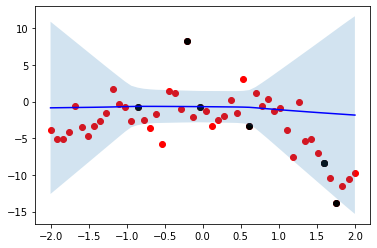

 12%|█▏        | 1187/10000 [00:16<00:58, 151.10it/s]

Mean loss at epoch 1200 : 2.547147750854492
 Validation loss after 1200 equals                     2.6120026111602783


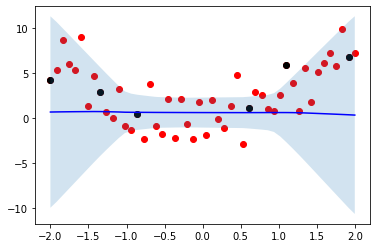

 13%|█▎        | 1298/10000 [00:17<01:02, 140.03it/s]

Mean loss at epoch 1300 : 2.9748659133911133
 Validation loss after 1300 equals                     2.6993789672851562


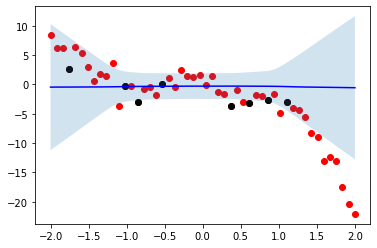

 14%|█▍        | 1388/10000 [00:18<01:09, 123.82it/s]

Mean loss at epoch 1400 : 2.5688583850860596
 Validation loss after 1400 equals                     2.363618850708008


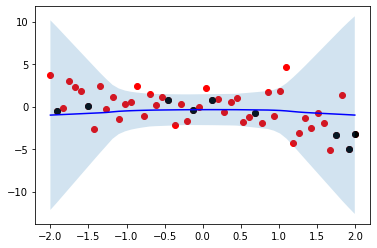

 15%|█▍        | 1498/10000 [00:20<02:55, 48.39it/s] 

Mean loss at epoch 1500 : 3.0077064037323
 Validation loss after 1500 equals                     2.4387903213500977


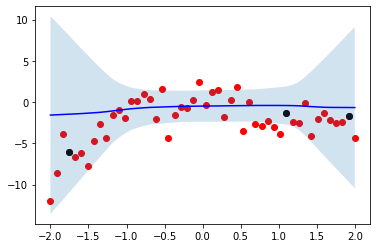

 16%|█▌        | 1591/10000 [00:21<01:25, 97.81it/s]

Mean loss at epoch 1600 : 2.711395502090454
 Validation loss after 1600 equals                     3.100501775741577


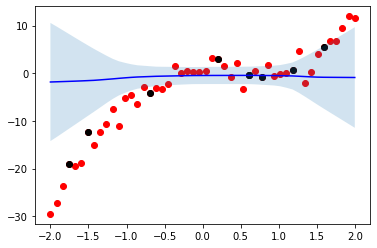

 17%|█▋        | 1697/10000 [00:22<01:21, 101.62it/s]

Mean loss at epoch 1700 : 3.046926975250244
 Validation loss after 1700 equals                     3.0010385513305664


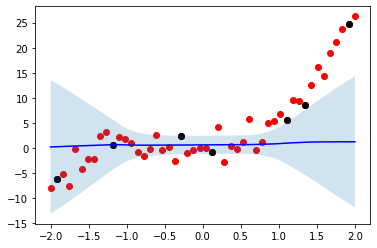

 18%|█▊        | 1792/10000 [00:24<01:34, 87.03it/s] 

Mean loss at epoch 1800 : 2.8233914375305176
 Validation loss after 1800 equals                     2.5987863540649414


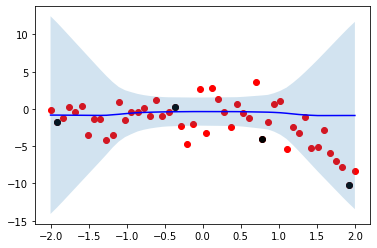

 19%|█▉        | 1895/10000 [00:26<02:42, 49.86it/s]

Mean loss at epoch 1900 : 2.548236608505249
 Validation loss after 1900 equals                     2.966916561126709


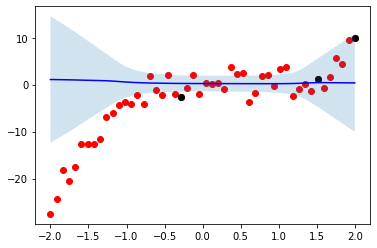

 20%|█▉        | 1998/10000 [00:27<01:14, 107.00it/s]

Mean loss at epoch 2000 : 2.4487719535827637
 Validation loss after 2000 equals                     2.6696243286132812


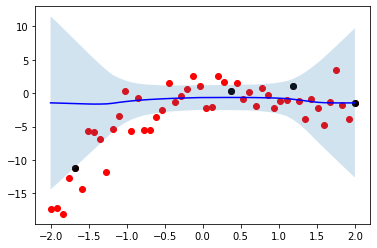

 21%|██        | 2093/10000 [00:28<01:14, 106.64it/s]

Mean loss at epoch 2100 : 2.653596878051758
 Validation loss after 2100 equals                     2.9896819591522217


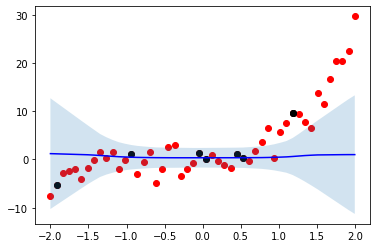

 22%|██▏       | 2194/10000 [00:29<01:19, 98.23it/s] 

Mean loss at epoch 2200 : 2.5103538036346436
 Validation loss after 2200 equals                     2.5376718044281006


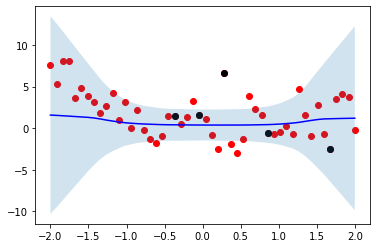

 23%|██▎       | 2291/10000 [00:31<01:25, 90.17it/s]

Mean loss at epoch 2300 : 2.915188789367676
 Validation loss after 2300 equals                     2.8443145751953125


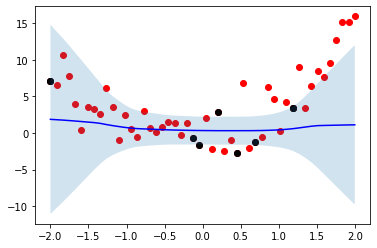

 24%|██▍       | 2397/10000 [00:34<01:48, 70.23it/s]

Mean loss at epoch 2400 : 2.3578124046325684
 Validation loss after 2400 equals                     2.8620798587799072


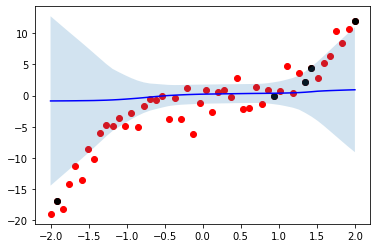

 25%|██▍       | 2491/10000 [00:35<01:10, 106.76it/s]

Mean loss at epoch 2500 : 2.847944974899292
 Validation loss after 2500 equals                     3.067795991897583


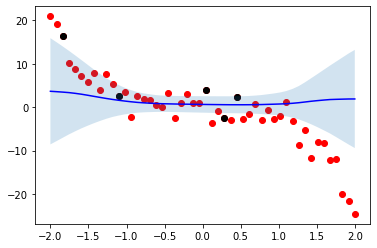

 26%|██▌       | 2593/10000 [00:36<01:04, 115.39it/s]

Mean loss at epoch 2600 : 2.6539840698242188
 Validation loss after 2600 equals                     2.520632028579712


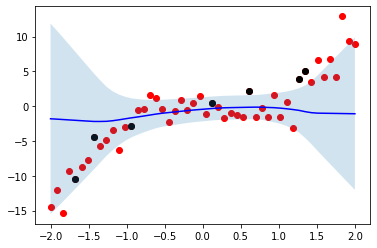

 27%|██▋       | 2692/10000 [00:39<01:48, 67.16it/s] 

Mean loss at epoch 2700 : 2.833895683288574
 Validation loss after 2700 equals                     2.661268949508667


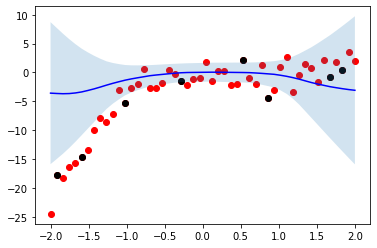

 28%|██▊       | 2797/10000 [00:39<00:52, 136.83it/s]

Mean loss at epoch 2800 : 2.8699088096618652
 Validation loss after 2800 equals                     2.7730724811553955


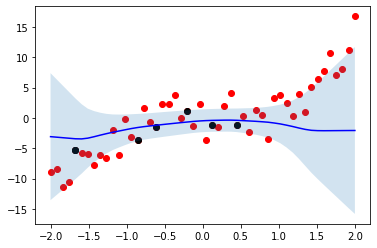

 29%|██▉       | 2889/10000 [00:40<00:43, 162.33it/s]

Mean loss at epoch 2900 : 2.515026807785034
 Validation loss after 2900 equals                     2.4926536083221436


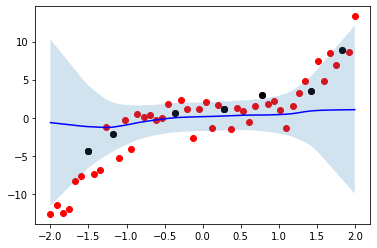

 30%|██▉       | 2999/10000 [00:42<03:28, 33.56it/s] 

Mean loss at epoch 3000 : 2.660264015197754
 Validation loss after 3000 equals                     2.3925323486328125


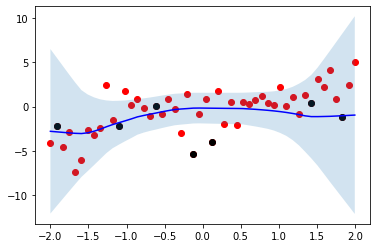

 31%|███       | 3099/10000 [00:48<11:10, 10.30it/s]

Mean loss at epoch 3100 : 2.409512996673584
 Validation loss after 3100 equals                     2.4177989959716797


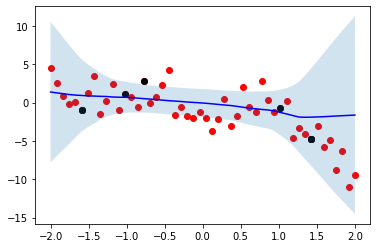

 32%|███▏      | 3198/10000 [00:52<02:19, 48.65it/s]

Mean loss at epoch 3200 : 2.7784228324890137
 Validation loss after 3200 equals                     2.459665060043335


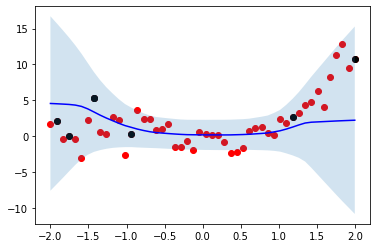

 33%|███▎      | 3292/10000 [00:54<01:53, 59.36it/s]

Mean loss at epoch 3300 : 2.769737958908081
 Validation loss after 3300 equals                     2.641464948654175


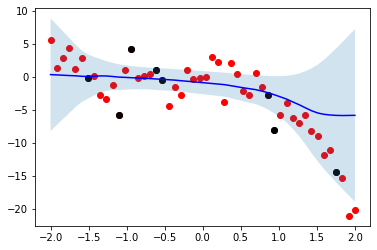

 34%|███▍      | 3398/10000 [00:55<01:21, 80.67it/s]

Mean loss at epoch 3400 : 2.9017717838287354
 Validation loss after 3400 equals                     2.6617541313171387


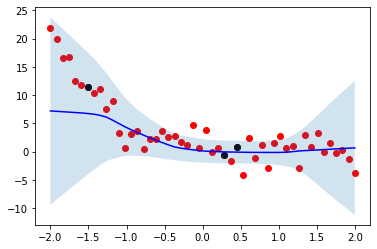

 35%|███▍      | 3481/10000 [00:56<01:17, 84.25it/s]

Mean loss at epoch 3500 : 2.5551960468292236
 Validation loss after 3500 equals                     2.613449811935425


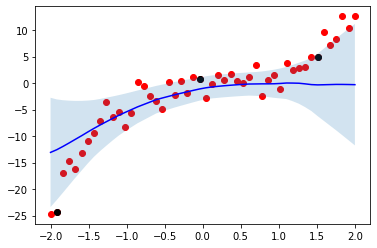

 36%|███▌      | 3591/10000 [00:57<00:49, 130.42it/s]

Mean loss at epoch 3600 : 2.728893518447876
 Validation loss after 3600 equals                     2.4055423736572266


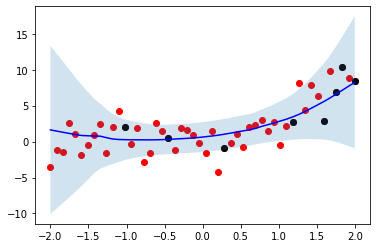

 37%|███▋      | 3693/10000 [00:58<00:49, 128.52it/s]

Mean loss at epoch 3700 : 2.6617400646209717
 Validation loss after 3700 equals                     2.5840718746185303


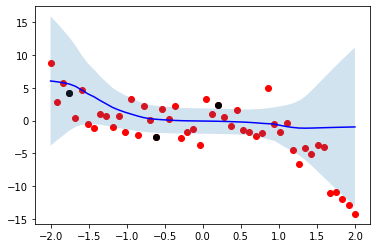

 38%|███▊      | 3790/10000 [00:59<00:43, 143.57it/s]

Mean loss at epoch 3800 : 2.65194034576416
 Validation loss after 3800 equals                     2.4757163524627686


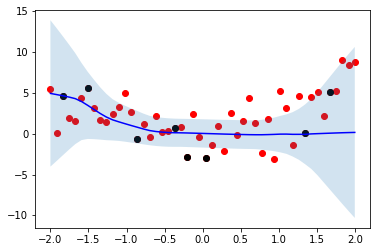

 39%|███▉      | 3898/10000 [01:01<01:39, 61.23it/s] 

Mean loss at epoch 3900 : 2.4861066341400146
 Validation loss after 3900 equals                     2.512237310409546


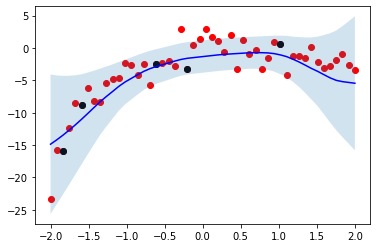

 40%|███▉      | 3999/10000 [01:07<06:49, 14.67it/s]

Mean loss at epoch 4000 : 2.430445909500122
 Validation loss after 4000 equals                     2.386521100997925


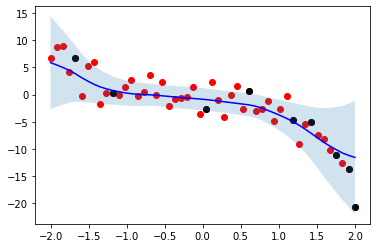

 41%|████      | 4097/10000 [01:09<01:39, 59.47it/s]

Mean loss at epoch 4100 : 2.4438109397888184
 Validation loss after 4100 equals                     2.576340913772583


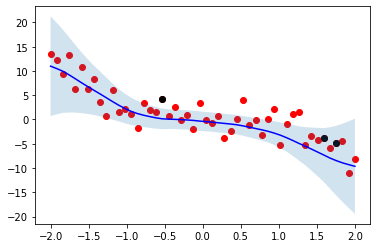

 42%|████▏     | 4189/10000 [01:10<01:26, 67.05it/s] 

Mean loss at epoch 4200 : 2.5468013286590576
 Validation loss after 4200 equals                     2.507164716720581


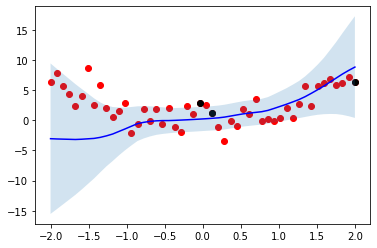

 43%|████▎     | 4298/10000 [01:11<00:45, 124.90it/s]

Mean loss at epoch 4300 : 2.8428962230682373
 Validation loss after 4300 equals                     2.523730516433716


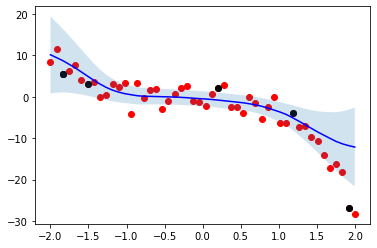

 44%|████▍     | 4383/10000 [01:11<00:37, 148.24it/s]

Mean loss at epoch 4400 : 2.9455132484436035
 Validation loss after 4400 equals                     3.129725933074951


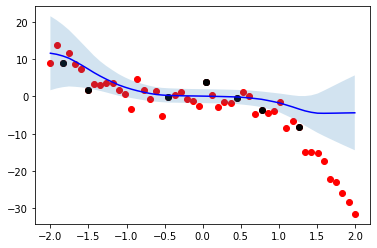

 45%|████▍     | 4495/10000 [01:12<00:49, 111.58it/s]

Mean loss at epoch 4500 : 2.9314050674438477
 Validation loss after 4500 equals                     2.7141218185424805


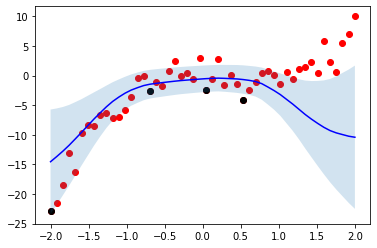

 46%|████▌     | 4591/10000 [01:13<00:37, 144.66it/s]

Mean loss at epoch 4600 : 2.4552643299102783
 Validation loss after 4600 equals                     2.614042043685913


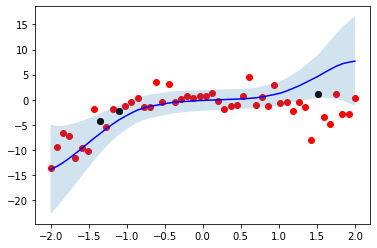

 47%|████▋     | 4693/10000 [01:14<00:51, 103.13it/s]

Mean loss at epoch 4700 : 2.5526626110076904
 Validation loss after 4700 equals                     2.3554372787475586


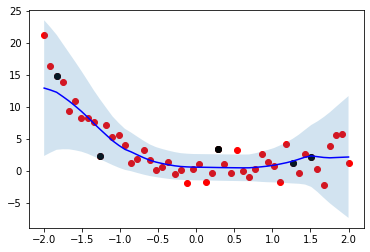

 48%|████▊     | 4794/10000 [01:15<00:39, 131.12it/s]

Mean loss at epoch 4800 : 2.5225088596343994
 Validation loss after 4800 equals                     2.429593086242676


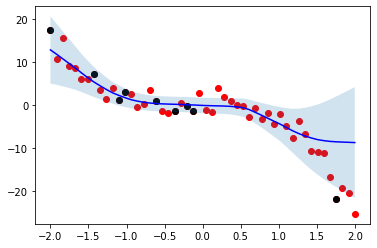

 49%|████▉     | 4888/10000 [01:17<01:13, 69.50it/s] 

Mean loss at epoch 4900 : 3.0816597938537598
 Validation loss after 4900 equals                     2.385073184967041


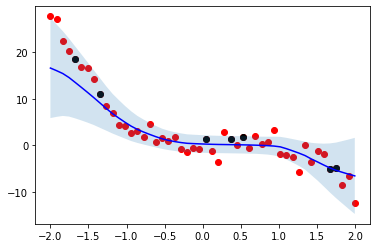

 50%|████▉     | 4989/10000 [01:18<00:58, 85.95it/s]

Mean loss at epoch 5000 : 2.7418277263641357
 Validation loss after 5000 equals                     2.460645914077759


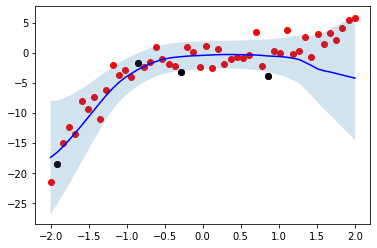

 51%|█████     | 5082/10000 [01:19<00:39, 124.41it/s]

Mean loss at epoch 5100 : 2.308096408843994
 Validation loss after 5100 equals                     2.4296159744262695


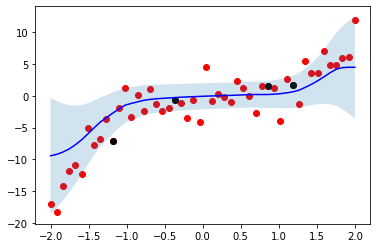

 52%|█████▏    | 5183/10000 [01:20<00:31, 151.30it/s]

Mean loss at epoch 5200 : 2.6315219402313232
 Validation loss after 5200 equals                     2.331244707107544


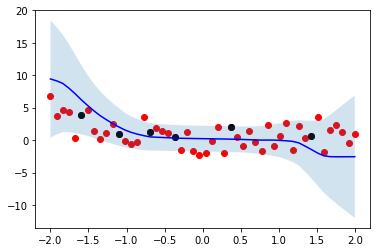

 53%|█████▎    | 5283/10000 [01:21<00:29, 158.31it/s]

Mean loss at epoch 5300 : 2.408355712890625
 Validation loss after 5300 equals                     2.6636829376220703


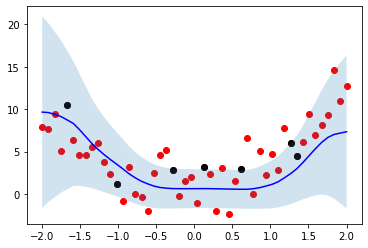

 54%|█████▍    | 5397/10000 [01:22<00:40, 113.21it/s]

Mean loss at epoch 5400 : 2.4115095138549805
 Validation loss after 5400 equals                     2.3688619136810303


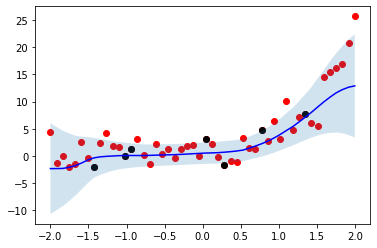

 55%|█████▍    | 5497/10000 [01:23<00:34, 131.80it/s]

Mean loss at epoch 5500 : 3.0797293186187744
 Validation loss after 5500 equals                     2.374089002609253


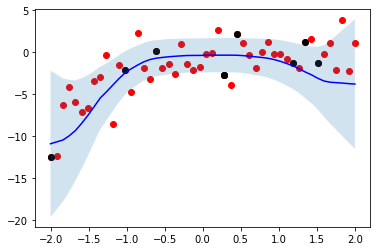

 56%|█████▌    | 5590/10000 [01:24<00:45, 97.73it/s] 

Mean loss at epoch 5600 : 2.558211088180542
 Validation loss after 5600 equals                     2.245297431945801


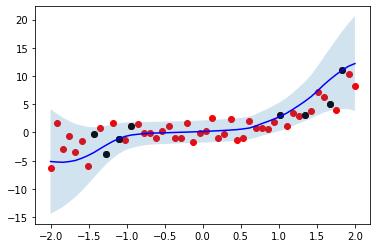

 57%|█████▋    | 5690/10000 [01:25<00:59, 72.69it/s]

Mean loss at epoch 5700 : 2.3801910877227783
 Validation loss after 5700 equals                     2.4786744117736816


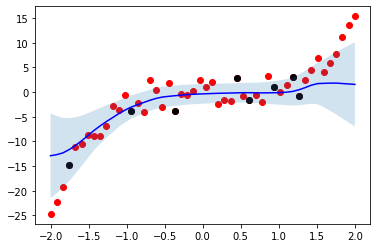

 58%|█████▊    | 5794/10000 [01:27<00:45, 91.60it/s]

Mean loss at epoch 5800 : 2.3127851486206055
 Validation loss after 5800 equals                     2.3092713356018066


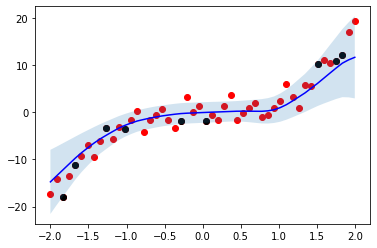

 59%|█████▉    | 5896/10000 [01:28<00:35, 116.62it/s]

Mean loss at epoch 5900 : 2.661201238632202
 Validation loss after 5900 equals                     2.955735206604004


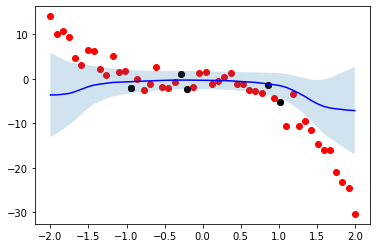

 60%|██████    | 6000/10000 [01:30<01:02, 64.12it/s] 

Mean loss at epoch 6000 : 2.4248433113098145
 Validation loss after 6000 equals                     2.515446424484253


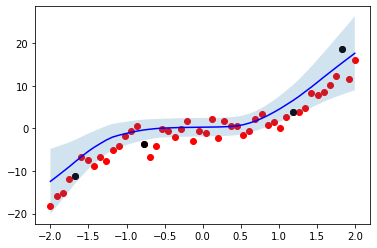

 61%|██████    | 6096/10000 [01:32<01:04, 60.68it/s]

Mean loss at epoch 6100 : 3.0317776203155518
 Validation loss after 6100 equals                     2.641906499862671


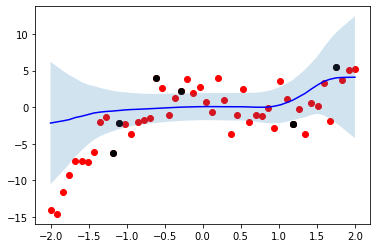

 62%|██████▏   | 6191/10000 [01:33<00:47, 80.27it/s]

Mean loss at epoch 6200 : 2.421898126602173
 Validation loss after 6200 equals                     2.3198347091674805


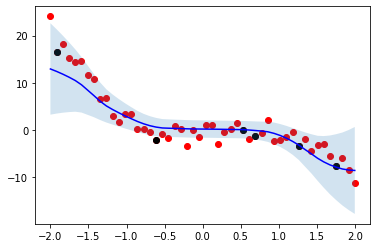

 63%|██████▎   | 6300/10000 [01:34<00:33, 108.89it/s]

Mean loss at epoch 6300 : 2.511481761932373
 Validation loss after 6300 equals                     2.4522974491119385


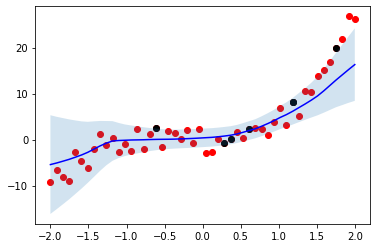

 64%|██████▍   | 6393/10000 [01:36<01:19, 45.57it/s] 

Mean loss at epoch 6400 : 2.5274407863616943
 Validation loss after 6400 equals                     2.8584351539611816


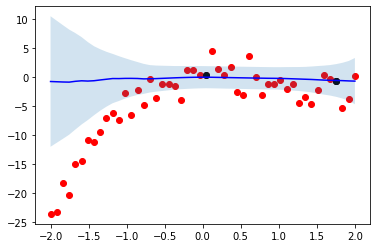

 65%|██████▍   | 6496/10000 [01:37<00:43, 80.03it/s]

Mean loss at epoch 6500 : 2.5609967708587646
 Validation loss after 6500 equals                     2.974489212036133


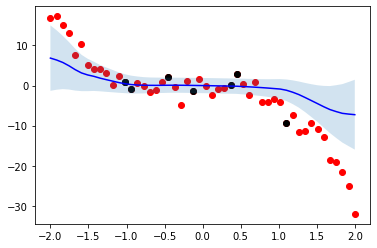

 66%|██████▌   | 6597/10000 [01:39<00:47, 71.42it/s]

Mean loss at epoch 6600 : 2.8006439208984375
 Validation loss after 6600 equals                     2.4916975498199463


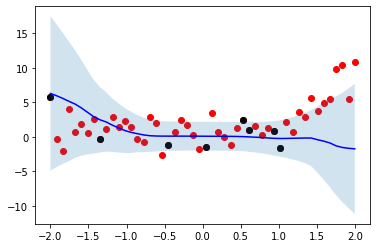

 67%|██████▋   | 6687/10000 [01:40<00:37, 89.47it/s]

Mean loss at epoch 6700 : 2.234424352645874
 Validation loss after 6700 equals                     2.267789840698242


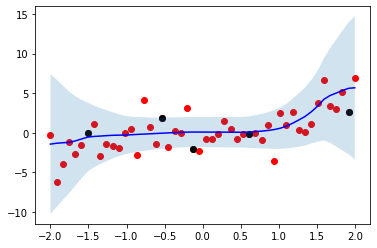

 68%|██████▊   | 6791/10000 [01:41<00:22, 142.64it/s]

Mean loss at epoch 6800 : 2.7327139377593994
 Validation loss after 6800 equals                     2.6029677391052246


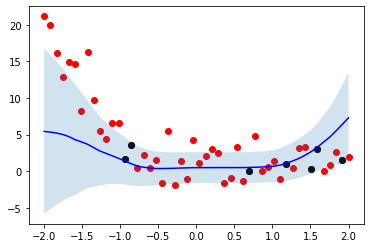

 69%|██████▉   | 6880/10000 [01:42<00:23, 130.23it/s]

Mean loss at epoch 6900 : 2.4425814151763916
 Validation loss after 6900 equals                     2.4397132396698


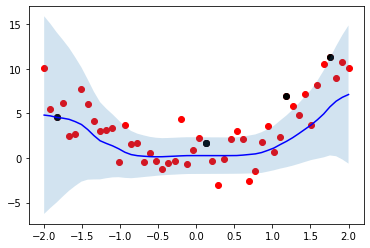

 70%|██████▉   | 6985/10000 [01:42<00:19, 155.00it/s]

Mean loss at epoch 7000 : 2.6062421798706055
 Validation loss after 7000 equals                     2.2913689613342285


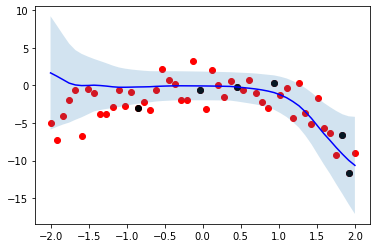

 71%|███████   | 7089/10000 [01:43<00:17, 166.47it/s]

Mean loss at epoch 7100 : 2.6660308837890625
 Validation loss after 7100 equals                     2.4887213706970215


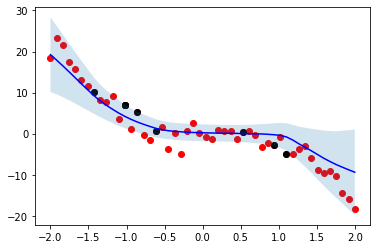

 72%|███████▏  | 7199/10000 [01:44<00:17, 158.59it/s]

Mean loss at epoch 7200 : 2.399430751800537
 Validation loss after 7200 equals                     2.832577705383301


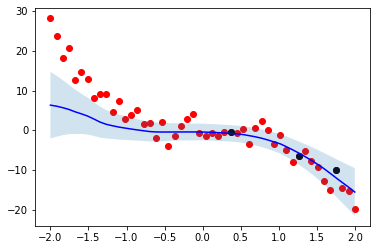

 73%|███████▎  | 7279/10000 [01:45<00:18, 149.51it/s]

Mean loss at epoch 7300 : 2.4616427421569824
 Validation loss after 7300 equals                     2.4769697189331055


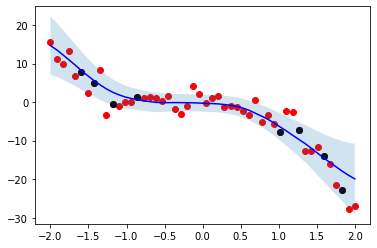

 74%|███████▍  | 7379/10000 [01:46<00:16, 157.03it/s]

Mean loss at epoch 7400 : 2.5723061561584473
 Validation loss after 7400 equals                     2.5351052284240723


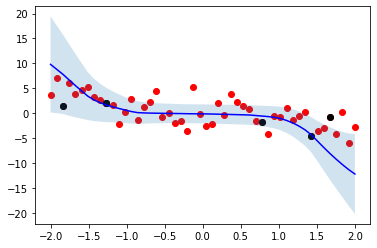

 75%|███████▍  | 7485/10000 [01:46<00:14, 173.40it/s]

Mean loss at epoch 7500 : 2.1961803436279297
 Validation loss after 7500 equals                     2.4665112495422363


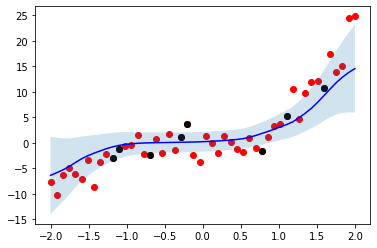

 76%|███████▌  | 7594/10000 [01:47<00:13, 176.27it/s]

Mean loss at epoch 7600 : 2.6213889122009277
 Validation loss after 7600 equals                     2.343931198120117


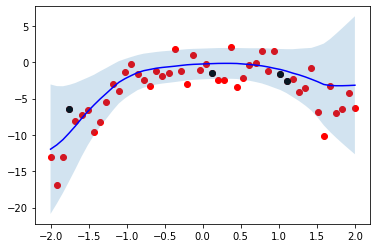

 77%|███████▋  | 7694/10000 [01:48<00:14, 161.02it/s]

Mean loss at epoch 7700 : 3.014375925064087
 Validation loss after 7700 equals                     2.29695463180542


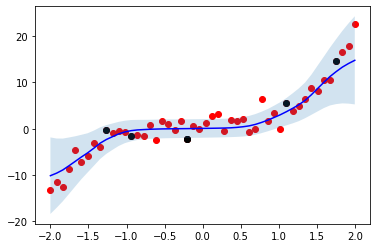

 78%|███████▊  | 7793/10000 [01:49<00:14, 152.17it/s]

Mean loss at epoch 7800 : 2.3352789878845215
 Validation loss after 7800 equals                     3.4123685359954834


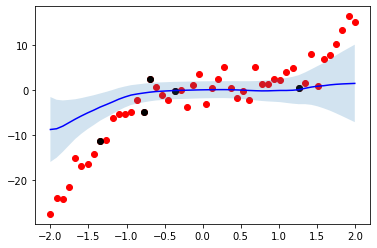

 79%|███████▉  | 7896/10000 [01:49<00:12, 167.48it/s]

Mean loss at epoch 7900 : 2.4817519187927246
 Validation loss after 7900 equals                     2.726208448410034


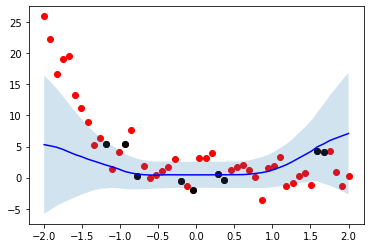

 80%|███████▉  | 7995/10000 [01:50<00:12, 157.47it/s]

Mean loss at epoch 8000 : 2.430901527404785
 Validation loss after 8000 equals                     2.544736385345459


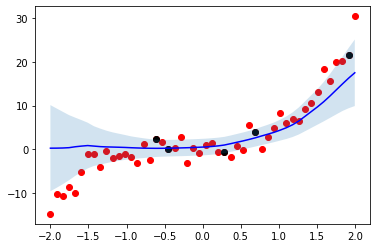

 81%|████████  | 8092/10000 [01:51<00:12, 149.97it/s]

Mean loss at epoch 8100 : 2.3568575382232666
 Validation loss after 8100 equals                     2.3732879161834717


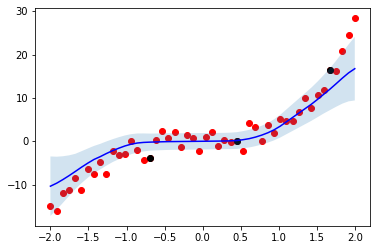

 82%|████████▏ | 8193/10000 [01:51<00:11, 161.17it/s]

Mean loss at epoch 8200 : 2.4328420162200928
 Validation loss after 8200 equals                     2.450880289077759


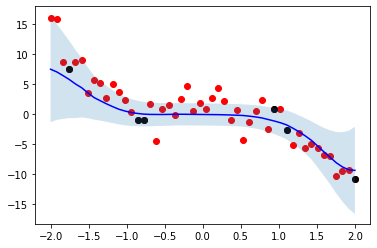

 83%|████████▎ | 8297/10000 [01:52<00:10, 159.98it/s]

Mean loss at epoch 8300 : 3.275222063064575
 Validation loss after 8300 equals                     2.5064637660980225


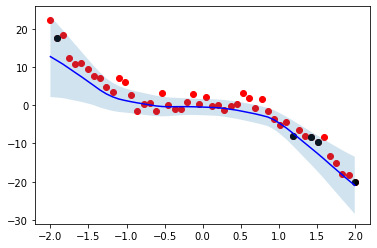

 84%|████████▍ | 8381/10000 [01:53<00:10, 150.89it/s]

Mean loss at epoch 8400 : 2.294325590133667
 Validation loss after 8400 equals                     2.359192371368408


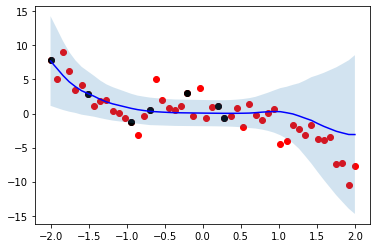

 85%|████████▍ | 8497/10000 [01:54<00:09, 163.39it/s]

Mean loss at epoch 8500 : 2.3495864868164062
 Validation loss after 8500 equals                     2.4778058528900146


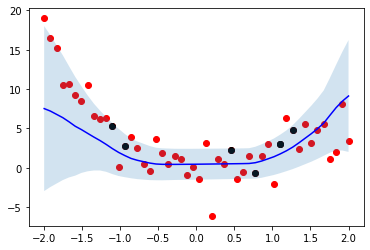

 86%|████████▌ | 8594/10000 [01:55<00:10, 137.37it/s]

Mean loss at epoch 8600 : 2.7813992500305176
 Validation loss after 8600 equals                     2.400329351425171


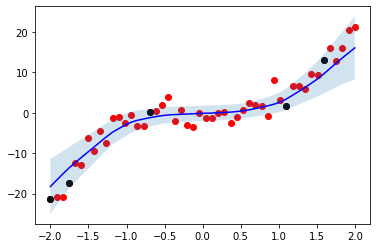

 87%|████████▋ | 8678/10000 [01:55<00:08, 150.96it/s]

Mean loss at epoch 8700 : 2.5747430324554443
 Validation loss after 8700 equals                     2.567875385284424


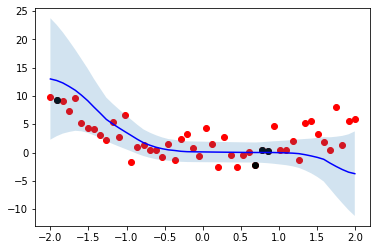

 88%|████████▊ | 8786/10000 [01:56<00:07, 171.43it/s]

Mean loss at epoch 8800 : 2.830778121948242
 Validation loss after 8800 equals                     2.6887457370758057


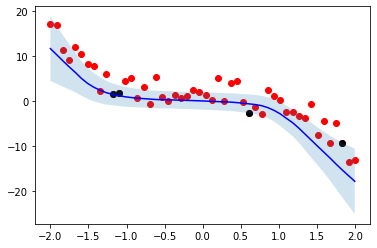

 89%|████████▉ | 8883/10000 [01:57<00:07, 159.47it/s]

Mean loss at epoch 8900 : 2.2852585315704346
 Validation loss after 8900 equals                     2.3603081703186035


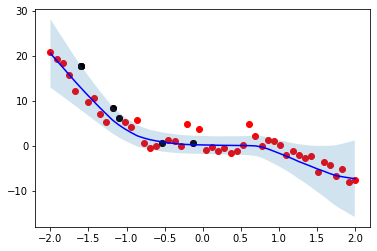

 90%|████████▉ | 8987/10000 [01:57<00:06, 167.44it/s]

Mean loss at epoch 9000 : 2.6406476497650146
 Validation loss after 9000 equals                     2.390801191329956


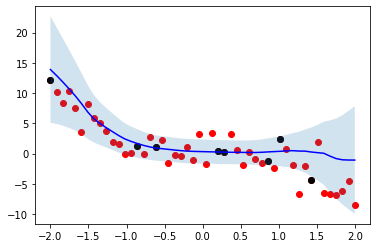

 91%|█████████ | 9093/10000 [01:58<00:05, 170.68it/s]

Mean loss at epoch 9100 : 2.536064624786377
 Validation loss after 9100 equals                     2.478803873062134


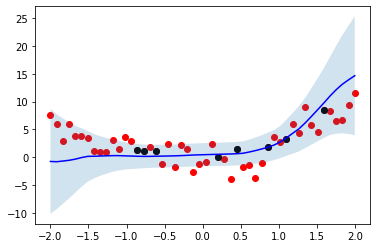

 92%|█████████▏| 9178/10000 [01:59<00:05, 154.69it/s]

Mean loss at epoch 9200 : 2.400456190109253
 Validation loss after 9200 equals                     2.6376230716705322


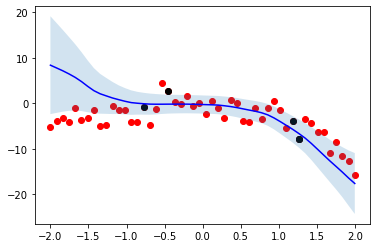

 93%|█████████▎| 9295/10000 [02:00<00:07, 95.40it/s] 

Mean loss at epoch 9300 : 2.7782411575317383
 Validation loss after 9300 equals                     2.309002161026001


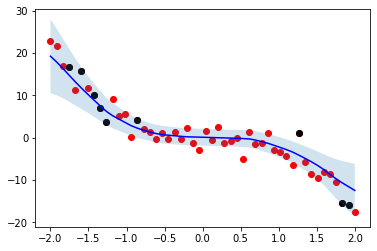

 94%|█████████▍| 9397/10000 [02:01<00:05, 111.50it/s]

Mean loss at epoch 9400 : 2.422323226928711
 Validation loss after 9400 equals                     2.402986764907837


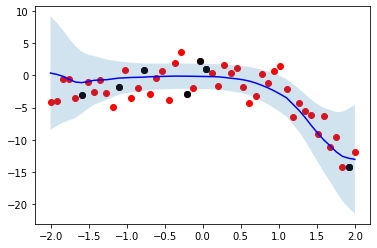

 95%|█████████▍| 9482/10000 [02:02<00:04, 125.79it/s]

Mean loss at epoch 9500 : 2.59309458732605
 Validation loss after 9500 equals                     2.476938486099243


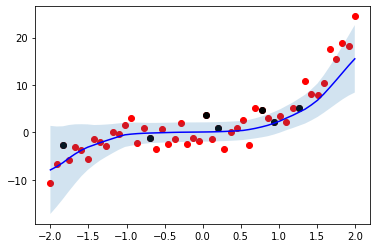

 96%|█████████▌| 9592/10000 [02:03<00:02, 152.40it/s]

Mean loss at epoch 9600 : 2.519043207168579
 Validation loss after 9600 equals                     2.3800292015075684


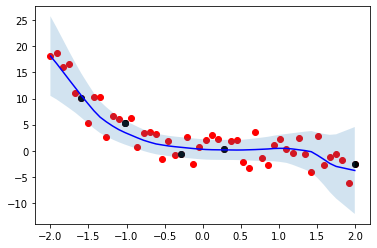

 97%|█████████▋| 9692/10000 [02:04<00:03, 78.48it/s] 

Mean loss at epoch 9700 : 3.550565719604492
 Validation loss after 9700 equals                     2.309915065765381


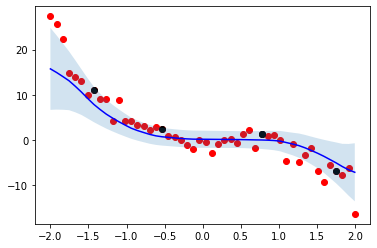

 98%|█████████▊| 9781/10000 [02:07<00:03, 66.07it/s]

Mean loss at epoch 9800 : 2.5842180252075195
 Validation loss after 9800 equals                     2.5909976959228516


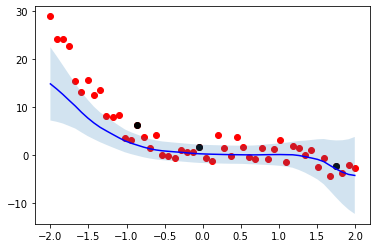

 99%|█████████▉| 9891/10000 [02:08<00:00, 111.19it/s]

Mean loss at epoch 9900 : 2.394282341003418
 Validation loss after 9900 equals                     2.6411375999450684


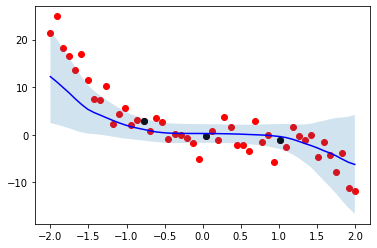

100%|██████████| 10000/10000 [02:09<00:00, 77.14it/s]


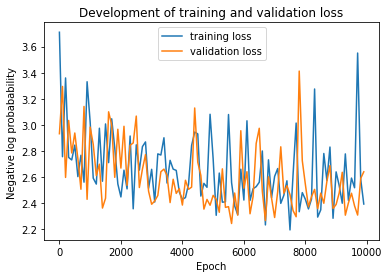

In [18]:
model_weights = trainer.run_training(**default_conf['multiple_functions']['training_params'])



## Using different datapoints from the same function

In [14]:
trainer = RegressionTrainer(**default_conf['single_function']['experiment_params'])

In [15]:
default_conf['single_function']['experiment_params']['min_contx']=49
default_conf['single_function']['experiment_params']['max_contx']=50

In [ ]:
default_conf['single_function']['experiment_params']

  0%|          | 0/100000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 38.822689056396484
 Validation loss after 0 equals                     23.558161735534668


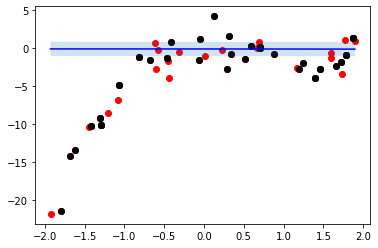

  1%|          | 999/100000 [02:29<1:45:33, 15.63it/s] 

Mean loss at epoch 1000 : 3.230992078781128
 Validation loss after 1000 equals                     3.2070586681365967


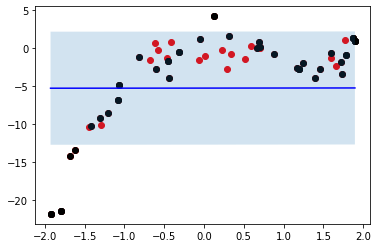

  2%|▏         | 2000/100000 [03:52<2:11:35, 12.41it/s] 

Mean loss at epoch 2000 : 3.2351295948028564
 Validation loss after 2000 equals                     3.1202787160873413


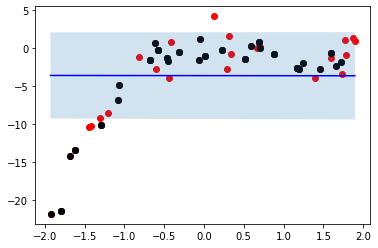

  3%|▎         | 3000/100000 [05:55<2:27:12, 10.98it/s] 

Mean loss at epoch 3000 : 3.2362277507781982
 Validation loss after 3000 equals                     3.126457452774048


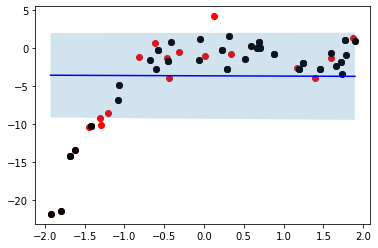

  4%|▍         | 4000/100000 [07:26<2:10:44, 12.24it/s]

Mean loss at epoch 4000 : 3.236196517944336
 Validation loss after 4000 equals                     3.1397993564605713


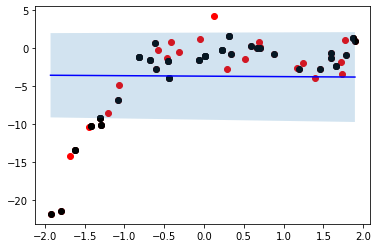

  5%|▍         | 4999/100000 [09:53<1:45:39, 14.99it/s] 

Mean loss at epoch 5000 : 3.228342294692993
 Validation loss after 5000 equals                     3.131775736808777


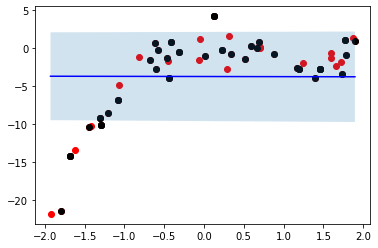

  6%|▌         | 6000/100000 [11:17<1:56:19, 13.47it/s] 

Mean loss at epoch 6000 : 3.2205820083618164
 Validation loss after 6000 equals                     3.1467909812927246


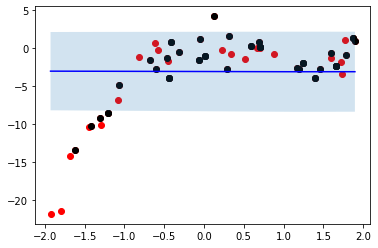

  7%|▋         | 6999/100000 [12:42<1:56:39, 13.29it/s]

Mean loss at epoch 7000 : 3.2267374992370605
 Validation loss after 7000 equals                     3.111107349395752


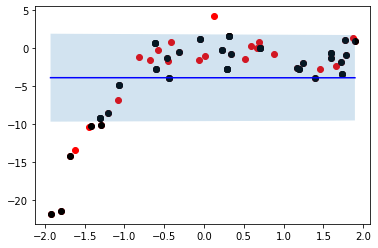

  8%|▊         | 7999/100000 [14:06<2:43:33,  9.38it/s] 

Mean loss at epoch 8000 : 3.2331910133361816
 Validation loss after 8000 equals                     3.1057441234588623


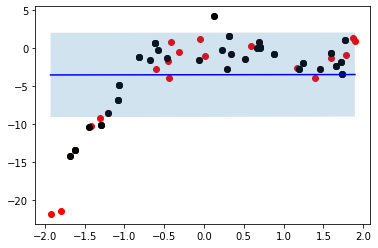

  9%|▉         | 8999/100000 [15:27<1:53:26, 13.37it/s]

Mean loss at epoch 9000 : 3.2240588665008545
 Validation loss after 9000 equals                     3.11391544342041


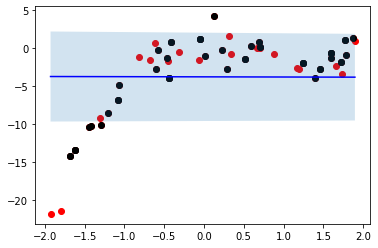

 10%|▉         | 9999/100000 [16:49<1:58:49, 12.62it/s]

Mean loss at epoch 10000 : 3.223250389099121
 Validation loss after 10000 equals                     3.120848536491394


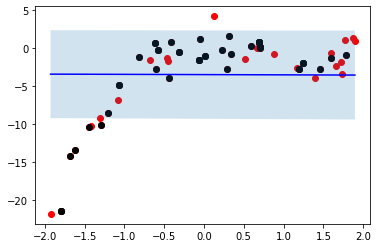

 11%|█         | 10999/100000 [18:14<1:58:25, 12.52it/s]

Mean loss at epoch 11000 : 3.2120375633239746
 Validation loss after 11000 equals                     3.1180611848831177


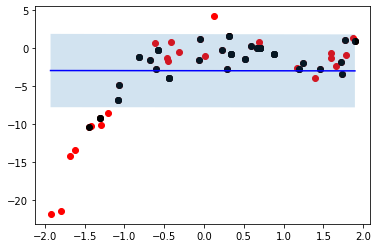

 12%|█▏        | 11999/100000 [19:34<6:12:32,  3.94it/s]

Mean loss at epoch 12000 : 3.2428760528564453
 Validation loss after 12000 equals                     3.1074193716049194


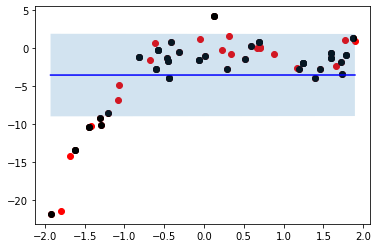

 13%|█▎        | 12999/100000 [20:59<1:20:53, 17.93it/s]

Mean loss at epoch 13000 : 3.2396693229675293
 Validation loss after 13000 equals                     3.1068416833877563


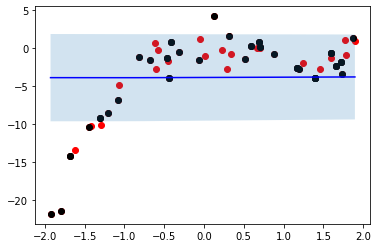

 14%|█▍        | 14000/100000 [22:15<3:23:28,  7.04it/s]

Mean loss at epoch 14000 : 3.1964471340179443
 Validation loss after 14000 equals                     3.1172831058502197


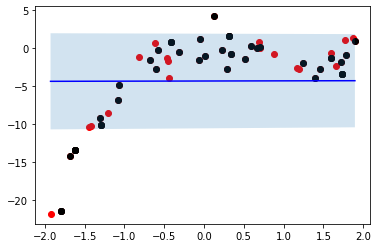

 15%|█▌        | 15000/100000 [23:36<1:56:15, 12.19it/s]

Mean loss at epoch 15000 : 3.2252564430236816
 Validation loss after 15000 equals                     3.100955367088318


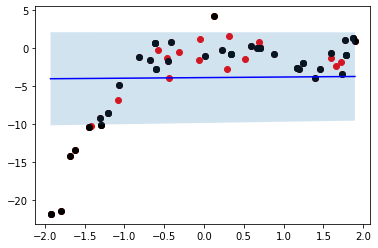

 16%|█▌        | 16000/100000 [25:05<3:56:11,  5.93it/s]

Mean loss at epoch 16000 : 3.2058191299438477
 Validation loss after 16000 equals                     3.1078799962997437


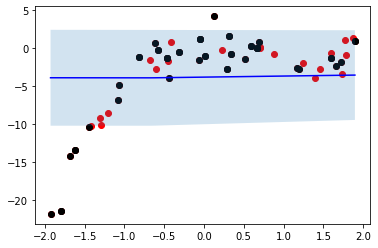

 17%|█▋        | 17000/100000 [27:06<2:04:29, 11.11it/s] 

Mean loss at epoch 17000 : 3.2247474193573
 Validation loss after 17000 equals                     3.1011539697647095


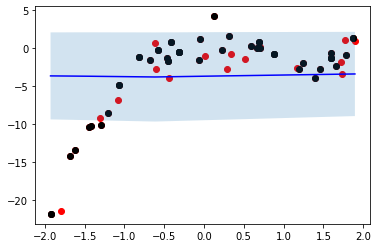

 18%|█▊        | 18000/100000 [29:30<1:55:59, 11.78it/s] 

Mean loss at epoch 18000 : 3.2206315994262695
 Validation loss after 18000 equals                     3.064486503601074


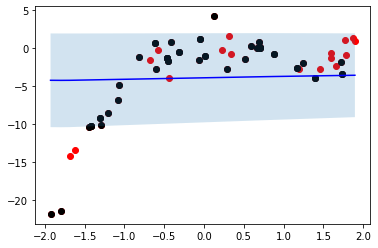

 19%|█▉        | 18999/100000 [31:12<1:47:03, 12.61it/s] 

Mean loss at epoch 19000 : 3.23380970954895
 Validation loss after 19000 equals                     3.0753167867660522


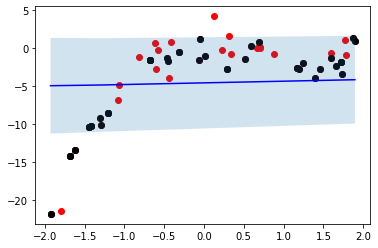

 20%|██        | 20000/100000 [32:54<1:37:13, 13.71it/s] 

Mean loss at epoch 20000 : 3.2467713356018066
 Validation loss after 20000 equals                     3.0893105268478394


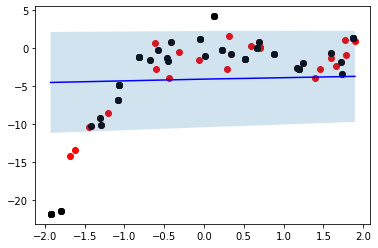

 21%|██        | 21000/100000 [34:44<1:59:43, 11.00it/s] 

Mean loss at epoch 21000 : 3.2181365489959717
 Validation loss after 21000 equals                     3.0629658699035645


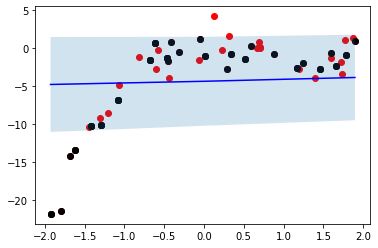

 22%|██▏       | 22000/100000 [36:54<2:03:49, 10.50it/s] 

Mean loss at epoch 22000 : 3.2092437744140625
 Validation loss after 22000 equals                     3.0199131965637207


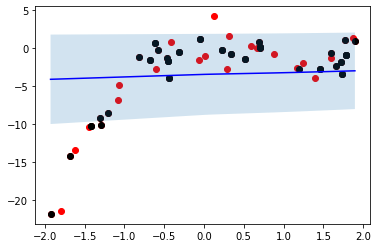

 23%|██▎       | 23000/100000 [38:41<1:58:27, 10.83it/s]

Mean loss at epoch 23000 : 3.2240703105926514
 Validation loss after 23000 equals                     3.0377228260040283


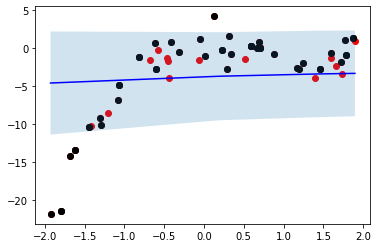

 24%|██▍       | 23998/100000 [39:36<45:02, 28.13it/s]  

Mean loss at epoch 24000 : 3.218764543533325
 Validation loss after 24000 equals                     3.0014253854751587


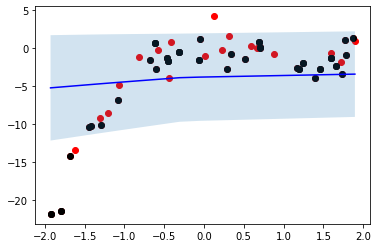

 25%|██▍       | 24998/100000 [40:13<47:51, 26.12it/s]  

Mean loss at epoch 25000 : 3.204251289367676
 Validation loss after 25000 equals                     2.954317331314087


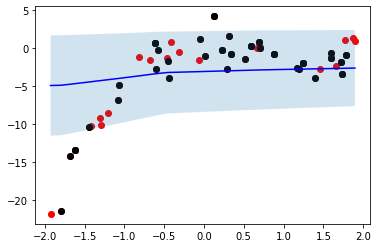

 26%|██▌       | 25999/100000 [40:49<43:10, 28.57it/s]  

Mean loss at epoch 26000 : 3.2113327980041504
 Validation loss after 26000 equals                     2.9794280529022217


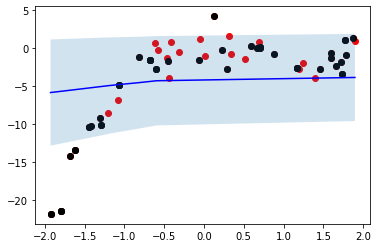

 27%|██▋       | 26999/100000 [41:24<43:21, 28.06it/s]  

Mean loss at epoch 27000 : 3.2342796325683594
 Validation loss after 27000 equals                     2.9681406021118164


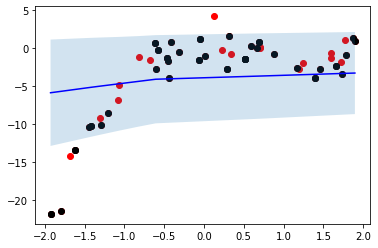

 28%|██▊       | 27999/100000 [41:59<41:42, 28.77it/s]  

Mean loss at epoch 28000 : 3.2200047969818115
 Validation loss after 28000 equals                     2.938582181930542


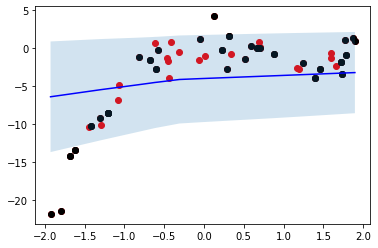

 29%|██▉       | 29000/100000 [42:35<40:57, 28.89it/s]  

Mean loss at epoch 29000 : 3.242696762084961
 Validation loss after 29000 equals                     2.8866655826568604


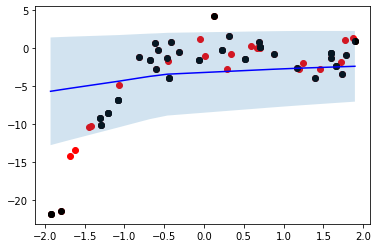

 30%|██▉       | 29997/100000 [43:10<38:46, 30.09it/s]  

Mean loss at epoch 30000 : 3.2220640182495117
 Validation loss after 30000 equals                     2.919029116630554


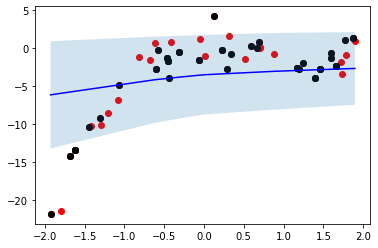

 31%|███       | 31000/100000 [43:46<39:20, 29.23it/s]

Mean loss at epoch 31000 : 3.2184183597564697
 Validation loss after 31000 equals                     2.957323670387268


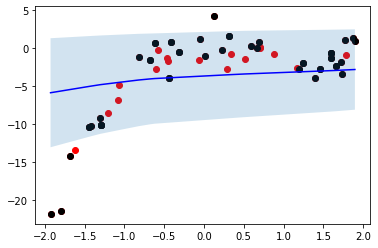

 32%|███▏      | 31998/100000 [44:22<39:34, 28.64it/s]

Mean loss at epoch 32000 : 3.2297816276550293
 Validation loss after 32000 equals                     2.9660686254501343


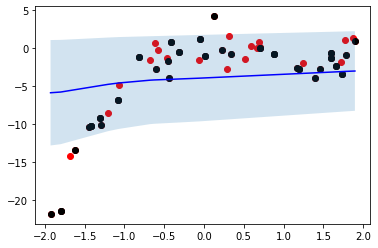

 33%|███▎      | 32998/100000 [44:57<38:43, 28.84it/s]  

Mean loss at epoch 33000 : 3.2329251766204834
 Validation loss after 33000 equals                     2.8942577838897705


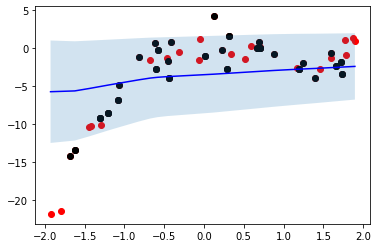

 34%|███▍      | 33999/100000 [45:32<37:52, 29.04it/s]  

Mean loss at epoch 34000 : 3.219942331314087
 Validation loss after 34000 equals                     2.880461812019348


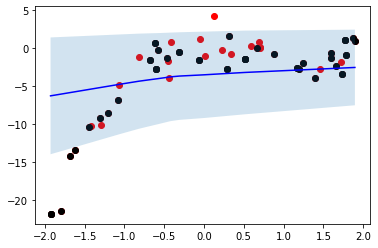

 35%|███▍      | 34999/100000 [46:08<39:04, 27.72it/s]

Mean loss at epoch 35000 : 3.216470956802368
 Validation loss after 35000 equals                     2.9910143613815308


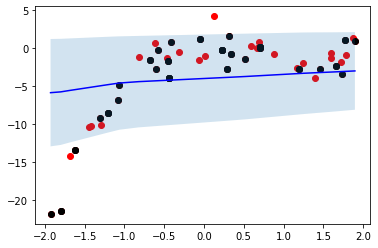

 36%|███▌      | 35999/100000 [46:43<37:38, 28.34it/s]  

Mean loss at epoch 36000 : 3.208012819290161
 Validation loss after 36000 equals                     2.899499535560608


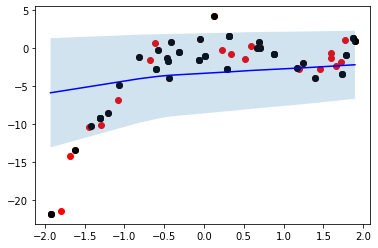

 37%|███▋      | 37000/100000 [47:18<36:43, 28.59it/s]

Mean loss at epoch 37000 : 3.2424843311309814
 Validation loss after 37000 equals                     2.900725245475769


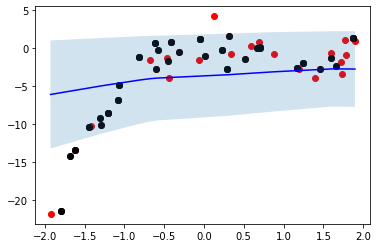

 38%|███▊      | 37999/100000 [48:05<46:24, 22.27it/s]  

Mean loss at epoch 38000 : 3.20290207862854
 Validation loss after 38000 equals                     2.9059959650039673


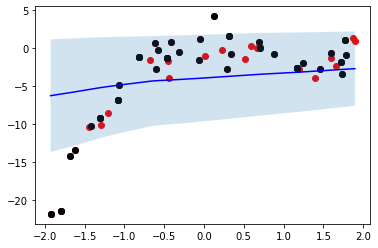

 39%|███▉      | 38998/100000 [48:40<33:52, 30.01it/s]  

Mean loss at epoch 39000 : 3.2291691303253174
 Validation loss after 39000 equals                     2.885144591331482


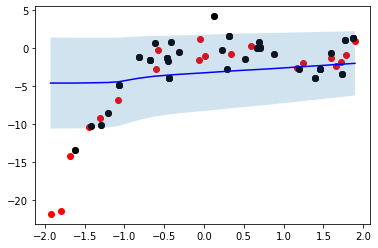

 40%|███▉      | 39999/100000 [49:15<34:06, 29.31it/s]

Mean loss at epoch 40000 : 3.2091434001922607
 Validation loss after 40000 equals                     2.9352216720581055


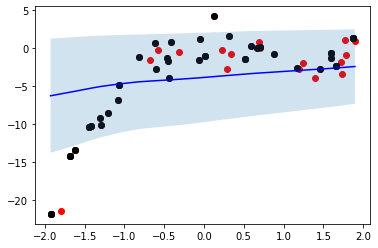

 41%|████      | 40998/100000 [49:49<33:37, 29.25it/s]

Mean loss at epoch 41000 : 3.221992015838623
 Validation loss after 41000 equals                     2.8685462474823


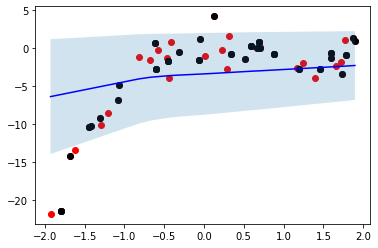

 42%|████▏     | 41997/100000 [50:25<31:59, 30.21it/s]

Mean loss at epoch 42000 : 3.2197399139404297
 Validation loss after 42000 equals                     2.9108306169509888


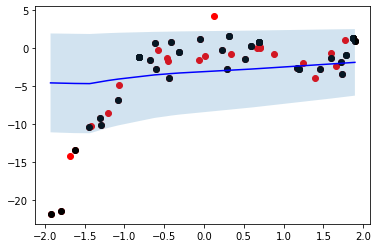

 43%|████▎     | 43000/100000 [50:59<31:37, 30.03it/s]

Mean loss at epoch 43000 : 3.2191624641418457
 Validation loss after 43000 equals                     2.846748113632202


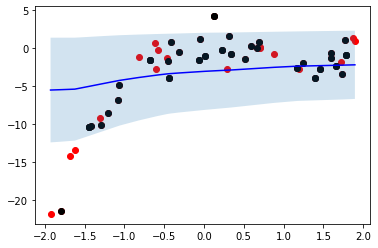

 44%|████▍     | 43998/100000 [51:35<31:51, 29.30it/s]  

Mean loss at epoch 44000 : 3.2295966148376465
 Validation loss after 44000 equals                     2.8492156267166138


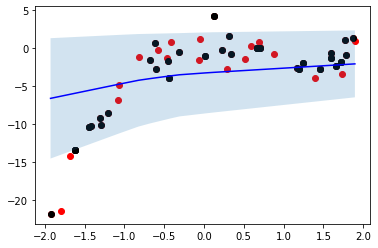

 45%|████▍     | 44998/100000 [52:10<33:04, 27.72it/s]

Mean loss at epoch 45000 : 3.2287497520446777
 Validation loss after 45000 equals                     2.8844109773635864


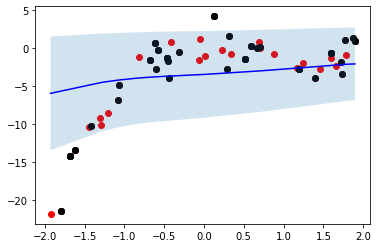

 46%|████▌     | 45999/100000 [52:44<29:28, 30.53it/s]

Mean loss at epoch 46000 : 3.218493700027466
 Validation loss after 46000 equals                     2.854013681411743


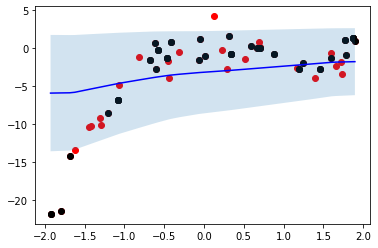

 47%|████▋     | 46998/100000 [53:17<30:20, 29.12it/s]

Mean loss at epoch 47000 : 3.2139031887054443
 Validation loss after 47000 equals                     2.906438708305359


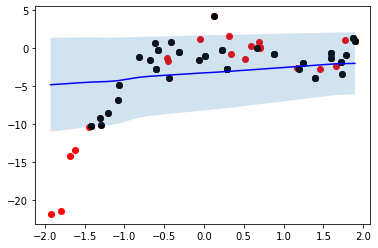

 48%|████▊     | 47999/100000 [54:03<38:06, 22.74it/s]  

Mean loss at epoch 48000 : 3.2245688438415527
 Validation loss after 48000 equals                     2.8886141777038574


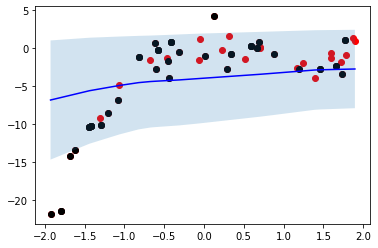

 49%|████▉     | 49000/100000 [54:56<28:57, 29.36it/s]  

Mean loss at epoch 49000 : 3.2021548748016357
 Validation loss after 49000 equals                     2.8244675397872925


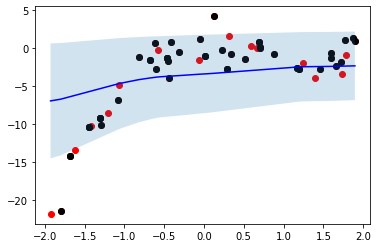

 50%|████▉     | 49999/100000 [55:31<34:29, 24.16it/s]  

Mean loss at epoch 50000 : 3.229630947113037
 Validation loss after 50000 equals                     2.8894007205963135


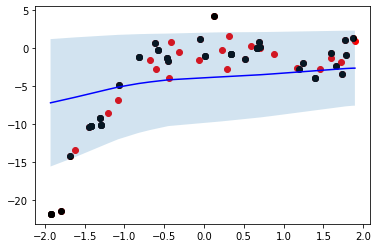

 51%|█████     | 50998/100000 [56:06<29:48, 27.40it/s]

Mean loss at epoch 51000 : 3.208427906036377
 Validation loss after 51000 equals                     2.8617265224456787


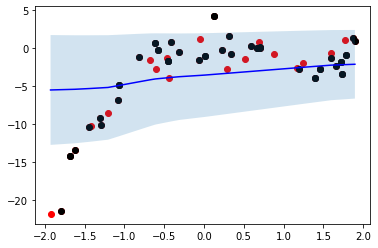

 52%|█████▏    | 51999/100000 [56:42<27:05, 29.53it/s]

Mean loss at epoch 52000 : 3.2155134677886963
 Validation loss after 52000 equals                     2.8328064680099487


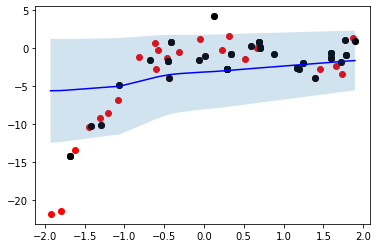

 53%|█████▎    | 53000/100000 [57:16<27:24, 28.59it/s]

Mean loss at epoch 53000 : 3.208832263946533
 Validation loss after 53000 equals                     2.8563098907470703


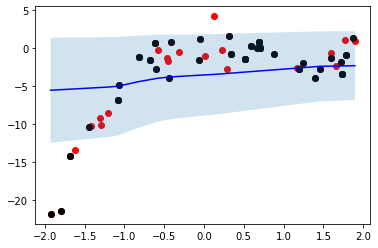

 54%|█████▍    | 53999/100000 [57:49<26:01, 29.46it/s]

Mean loss at epoch 54000 : 3.2112860679626465
 Validation loss after 54000 equals                     2.8331947326660156


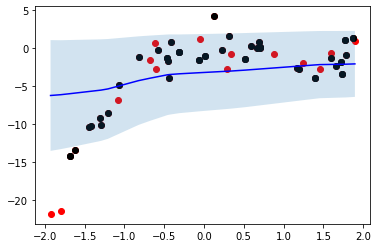

 55%|█████▍    | 54999/100000 [58:28<24:49, 30.22it/s]  

Mean loss at epoch 55000 : 3.264586925506592
 Validation loss after 55000 equals                     2.8352010250091553


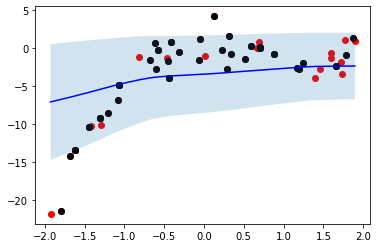

 56%|█████▌    | 55997/100000 [59:01<24:17, 30.19it/s]

Mean loss at epoch 56000 : 3.1891071796417236
 Validation loss after 56000 equals                     2.811213970184326


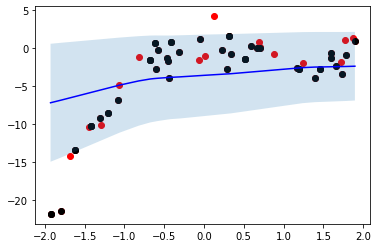

 57%|█████▋    | 56997/100000 [59:35<23:30, 30.49it/s]

Mean loss at epoch 57000 : 3.1939492225646973
 Validation loss after 57000 equals                     2.824838876724243


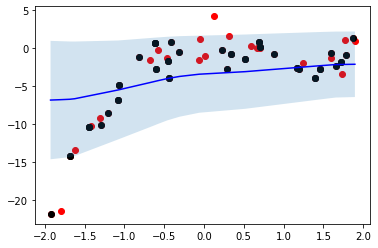

 58%|█████▊    | 58000/100000 [1:00:11<25:14, 27.73it/s]

Mean loss at epoch 58000 : 3.2140347957611084
 Validation loss after 58000 equals                     2.89670193195343


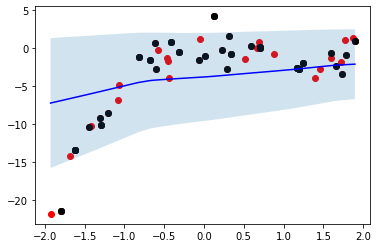

 59%|█████▉    | 58998/100000 [1:00:45<22:04, 30.96it/s]

Mean loss at epoch 59000 : 3.2242796421051025
 Validation loss after 59000 equals                     2.8592687845230103


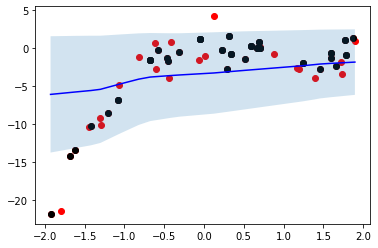

 60%|██████    | 60000/100000 [1:01:19<23:17, 28.62it/s]

Mean loss at epoch 60000 : 3.2436435222625732
 Validation loss after 60000 equals                     2.8202496767044067


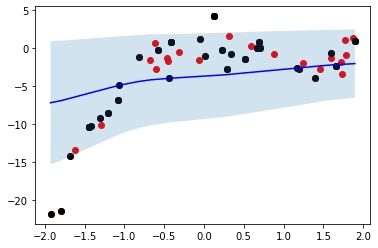

 61%|██████    | 60999/100000 [1:01:54<22:18, 29.15it/s]  

Mean loss at epoch 61000 : 3.221407651901245
 Validation loss after 61000 equals                     2.8188337087631226


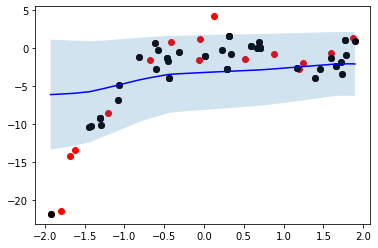

 62%|██████▏   | 62000/100000 [1:02:30<20:46, 30.49it/s]

Mean loss at epoch 62000 : 3.230863332748413
 Validation loss after 62000 equals                     2.8422203063964844


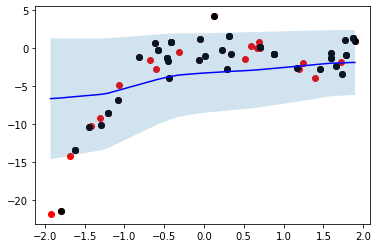

 63%|██████▎   | 63000/100000 [1:03:04<20:45, 29.71it/s]

Mean loss at epoch 63000 : 3.247206687927246
 Validation loss after 63000 equals                     2.9115952253341675


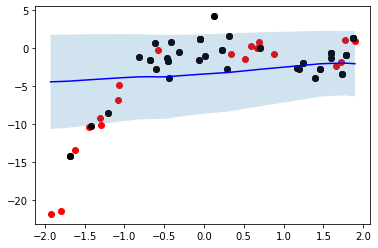

 64%|██████▍   | 64000/100000 [1:03:38<20:19, 29.53it/s]

Mean loss at epoch 64000 : 3.2189218997955322
 Validation loss after 64000 equals                     2.8169825077056885


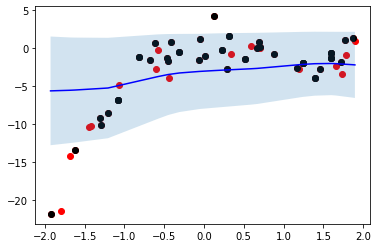

 65%|██████▍   | 64998/100000 [1:04:13<20:54, 27.90it/s]

Mean loss at epoch 65000 : 3.2245702743530273
 Validation loss after 65000 equals                     2.816198945045471


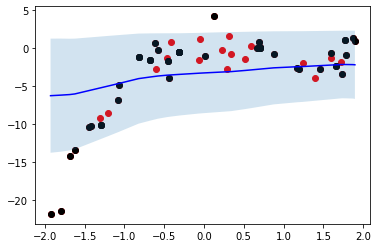

 66%|██████▌   | 65998/100000 [1:04:47<19:32, 29.00it/s]

Mean loss at epoch 66000 : 3.2271838188171387
 Validation loss after 66000 equals                     2.809164047241211


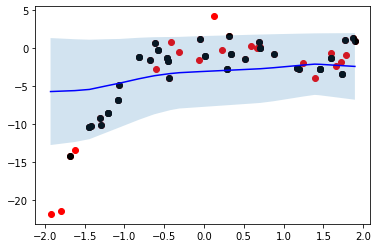

 67%|██████▋   | 66997/100000 [1:05:23<18:10, 30.28it/s]  

Mean loss at epoch 67000 : 3.2295193672180176
 Validation loss after 67000 equals                     2.834297299385071


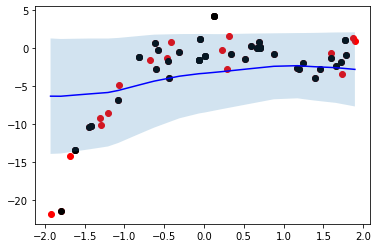

 68%|██████▊   | 68000/100000 [1:05:57<17:27, 30.53it/s]

Mean loss at epoch 68000 : 3.244298219680786
 Validation loss after 68000 equals                     2.883381724357605


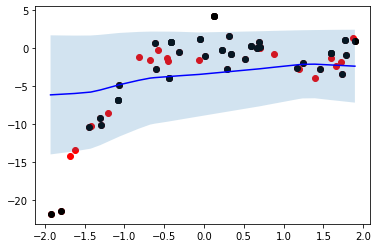

 69%|██████▉   | 69000/100000 [1:06:31<17:00, 30.37it/s]

Mean loss at epoch 69000 : 3.2158546447753906
 Validation loss after 69000 equals                     2.830412983894348


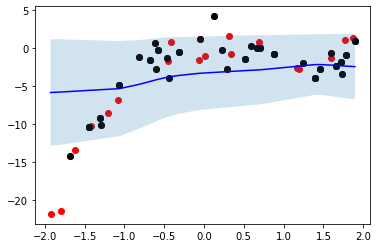

 70%|███████   | 70000/100000 [1:07:05<16:38, 30.05it/s]

Mean loss at epoch 70000 : 3.236454963684082
 Validation loss after 70000 equals                     2.8157542943954468


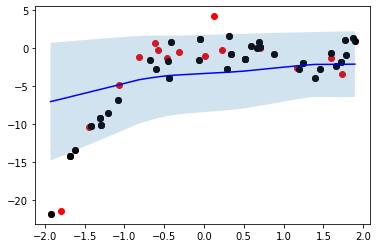

 71%|███████   | 70998/100000 [1:07:39<16:03, 30.11it/s]

Mean loss at epoch 71000 : 3.2235000133514404
 Validation loss after 71000 equals                     2.882545232772827


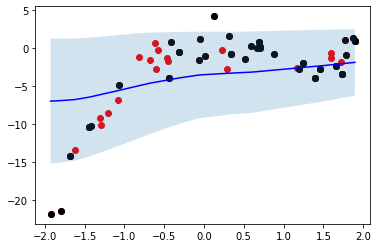

 72%|███████▏  | 71998/100000 [1:08:14<15:32, 30.02it/s]

Mean loss at epoch 72000 : 3.230456829071045
 Validation loss after 72000 equals                     2.8129332065582275


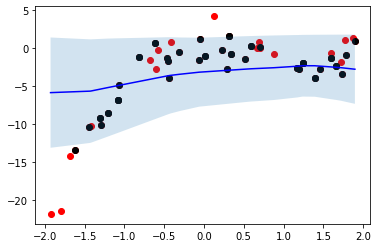

 73%|███████▎  | 72998/100000 [1:08:48<14:55, 30.15it/s]

Mean loss at epoch 73000 : 3.2143054008483887
 Validation loss after 73000 equals                     2.833600163459778


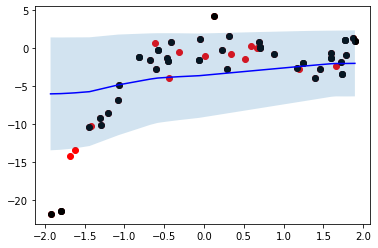

 74%|███████▍  | 73998/100000 [1:09:21<14:13, 30.48it/s]

Mean loss at epoch 74000 : 3.221679925918579
 Validation loss after 74000 equals                     2.8238760232925415


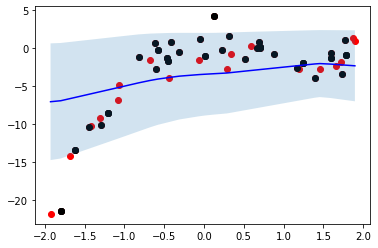

 75%|███████▍  | 74998/100000 [1:09:55<16:15, 25.63it/s]

Mean loss at epoch 75000 : 3.2443840503692627
 Validation loss after 75000 equals                     2.8667666912078857


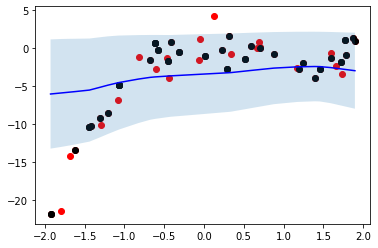

 76%|███████▌  | 76000/100000 [1:10:30<13:29, 29.63it/s]

Mean loss at epoch 76000 : 3.2303643226623535
 Validation loss after 76000 equals                     2.8411980867385864


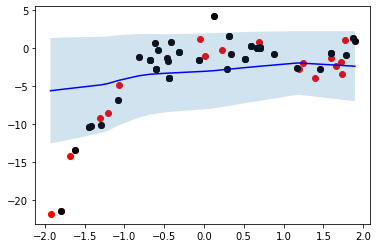

 77%|███████▋  | 76999/100000 [1:11:04<12:51, 29.81it/s]

Mean loss at epoch 77000 : 3.223677396774292
 Validation loss after 77000 equals                     2.8195325136184692


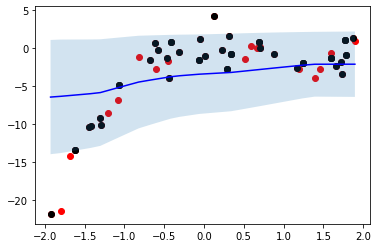

 78%|███████▊  | 77998/100000 [1:11:38<12:03, 30.41it/s]

Mean loss at epoch 78000 : 3.233306407928467
 Validation loss after 78000 equals                     2.8160324096679688


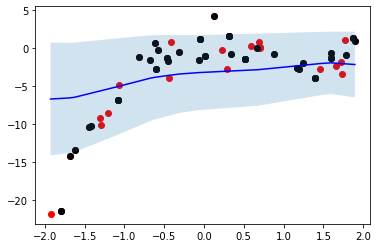

 79%|███████▉  | 78997/100000 [1:12:14<12:24, 28.21it/s]  

Mean loss at epoch 79000 : 3.224672317504883
 Validation loss after 79000 equals                     2.8929890394210815


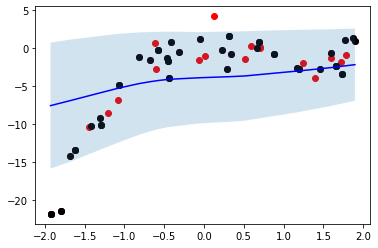

 80%|████████  | 80000/100000 [1:12:52<1:09:11,  4.82it/s]

Mean loss at epoch 80000 : 3.221376419067383
 Validation loss after 80000 equals                     2.8306487798690796


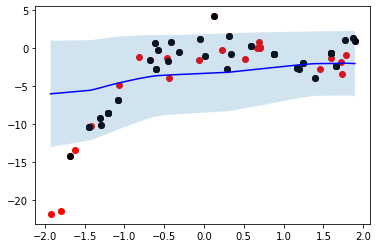

 81%|████████  | 80998/100000 [1:13:35<11:01, 28.74it/s]  

Mean loss at epoch 81000 : 3.2292253971099854
 Validation loss after 81000 equals                     2.802387237548828


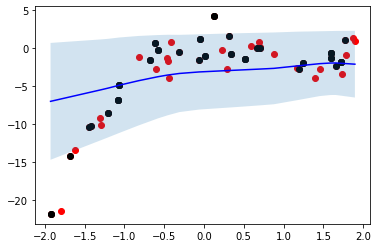

 82%|████████▏ | 81998/100000 [1:14:10<11:11, 26.82it/s]

Mean loss at epoch 82000 : 3.223912477493286
 Validation loss after 82000 equals                     2.806212902069092


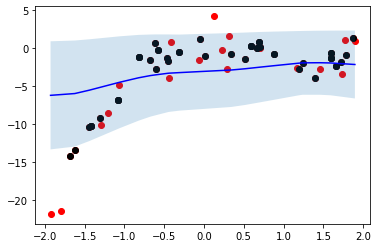

 83%|████████▎ | 82857/100000 [1:14:42<15:27, 18.48it/s]


KeyboardInterrupt: 

In [16]:
model_weights = trainer.run_training(**default_conf['single_function']['training_params'])


In [36]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
dataset = pd.read_csv(
    default_conf['single_function']['training_params']['kwargs']['data_path'])

In [55]:
train, test = train_test_split(dataset,test_size=0.33)
train,test = train.reset_index(drop=True), test.reset_index(drop=True)
idx = np.random.randint(0, len(X_train),50)
X_train, y_train = train['x'][idx], train['target'][idx]
X_test, y_test = test['x'], test['target']

X_train = X_train[:,None]
X_test = X_test[:,None]

In [56]:
model = GaussianProcessRegressor()

In [57]:
model.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [58]:
y_pred = model.predict(X_test)

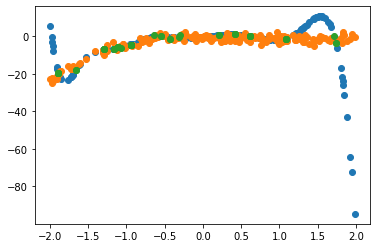

In [59]:
plt.scatter(X_test,y_pred)
plt.scatter(X_test,y_test)
plt.scatter(X_train, y_train)